# 33. FUZZYX CLUSTERING
---

## 1. Introducing the Data

Source: Daniel Graves, Witold Pedrycz, Kernel-based fuzzy clustering
and fuzzy clustering: A comparative experimental study,
Fuzzy Sets and Systems 161(4), 2010, 522-543

One of the "synthetic data sets" from the above-mentioned paper.

Labels generated by A. Cena and M. Gagolewski.
`0` denotes the noise class (if present).

In [14]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

cols = ['col1', 'col2']
fuzzyx = pd.read_csv('data/fuzzyx.data.gz', delimiter=" ",  header=None)
labels = pd.read_csv('data/fuzzyx.labels5.gz', header=None)
fuzzyx.columns = cols
fuzzyx['labels'] = labels
print(fuzzyx.shape)
fuzzyx.head()

(1000, 3)


,col1,col2,labels
0,-0.002,-0.035,4
1,-0.064,0.056,4
2,-0.060,0.003,4
3,0.093,0.009,4
4,0.080,-0.097,4


In [15]:
labels.value_counts()

1    314
2    245
3    226
4    215
dtype: int64

## 2. Data Visualization

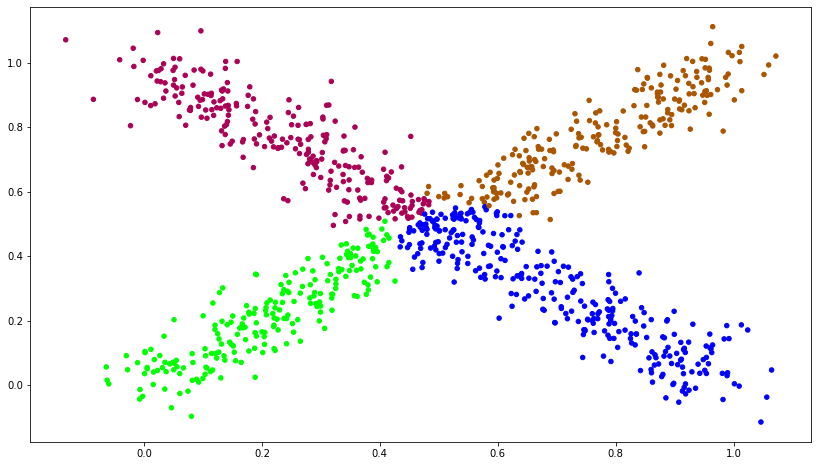

In [24]:
import matplotlib.pyplot as plt

X = fuzzyx[cols]
fig = plt.figure(figsize=(14,8))
plt.scatter(X['col1'], X['col2'], c=labels, 
           cmap=plt.cm.brg, s=20)
plt.show()

## 3. The Elbow Method

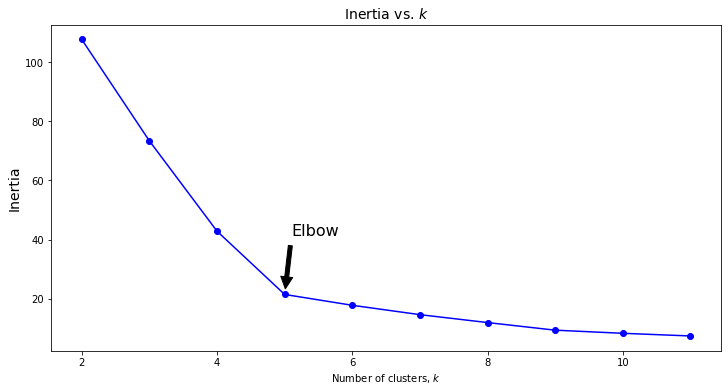

In [27]:
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(2, 12)]
inertias = [model.inertia_ for model in kmeans_per_k]
    
plt.figure(figsize=(12, 6))
plt.plot(range(2, 12), inertias, 'bo-')
plt.title('Inertia vs. $k$', fontsize=14)
plt.xlabel('Number of clusters, $k$')
plt.ylabel('Inertia', fontsize=14) 
plt.annotate('Elbow',
             xy=(5, inertias[3]),
             xytext=(0.40, 0.40),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()